📚 1. IMPORTING REQUIRED LIBRARIES...
✅ Libraries imported successfully!

🔧 2. DEFINING REQUIRED CLASSES...
✅ All classes defined successfully!

📥 3. LOADING AND INSPECTING DATA...
✅ Dataset loaded successfully!
📊 DATASET OVERVIEW:
• Dataset Shape: (4600, 6)
• Number of Features: 6
• Number of Samples: 4600
• Columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

🔍 FIRST 5 ROWS:
       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors
0   313000.0         3       1.50         1340      7912     1.5
1  2384000.0         5       2.50         3650      9050     2.0
2   342000.0         3       2.00         1930     11947     1.0
3   420000.0         3       2.25         2000      8030     1.0
4   550000.0         4       2.50         1940     10500     1.0

📋 DATA TYPES:
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
dtype: object
✅ Data loading completed!

🧹 4. DAT

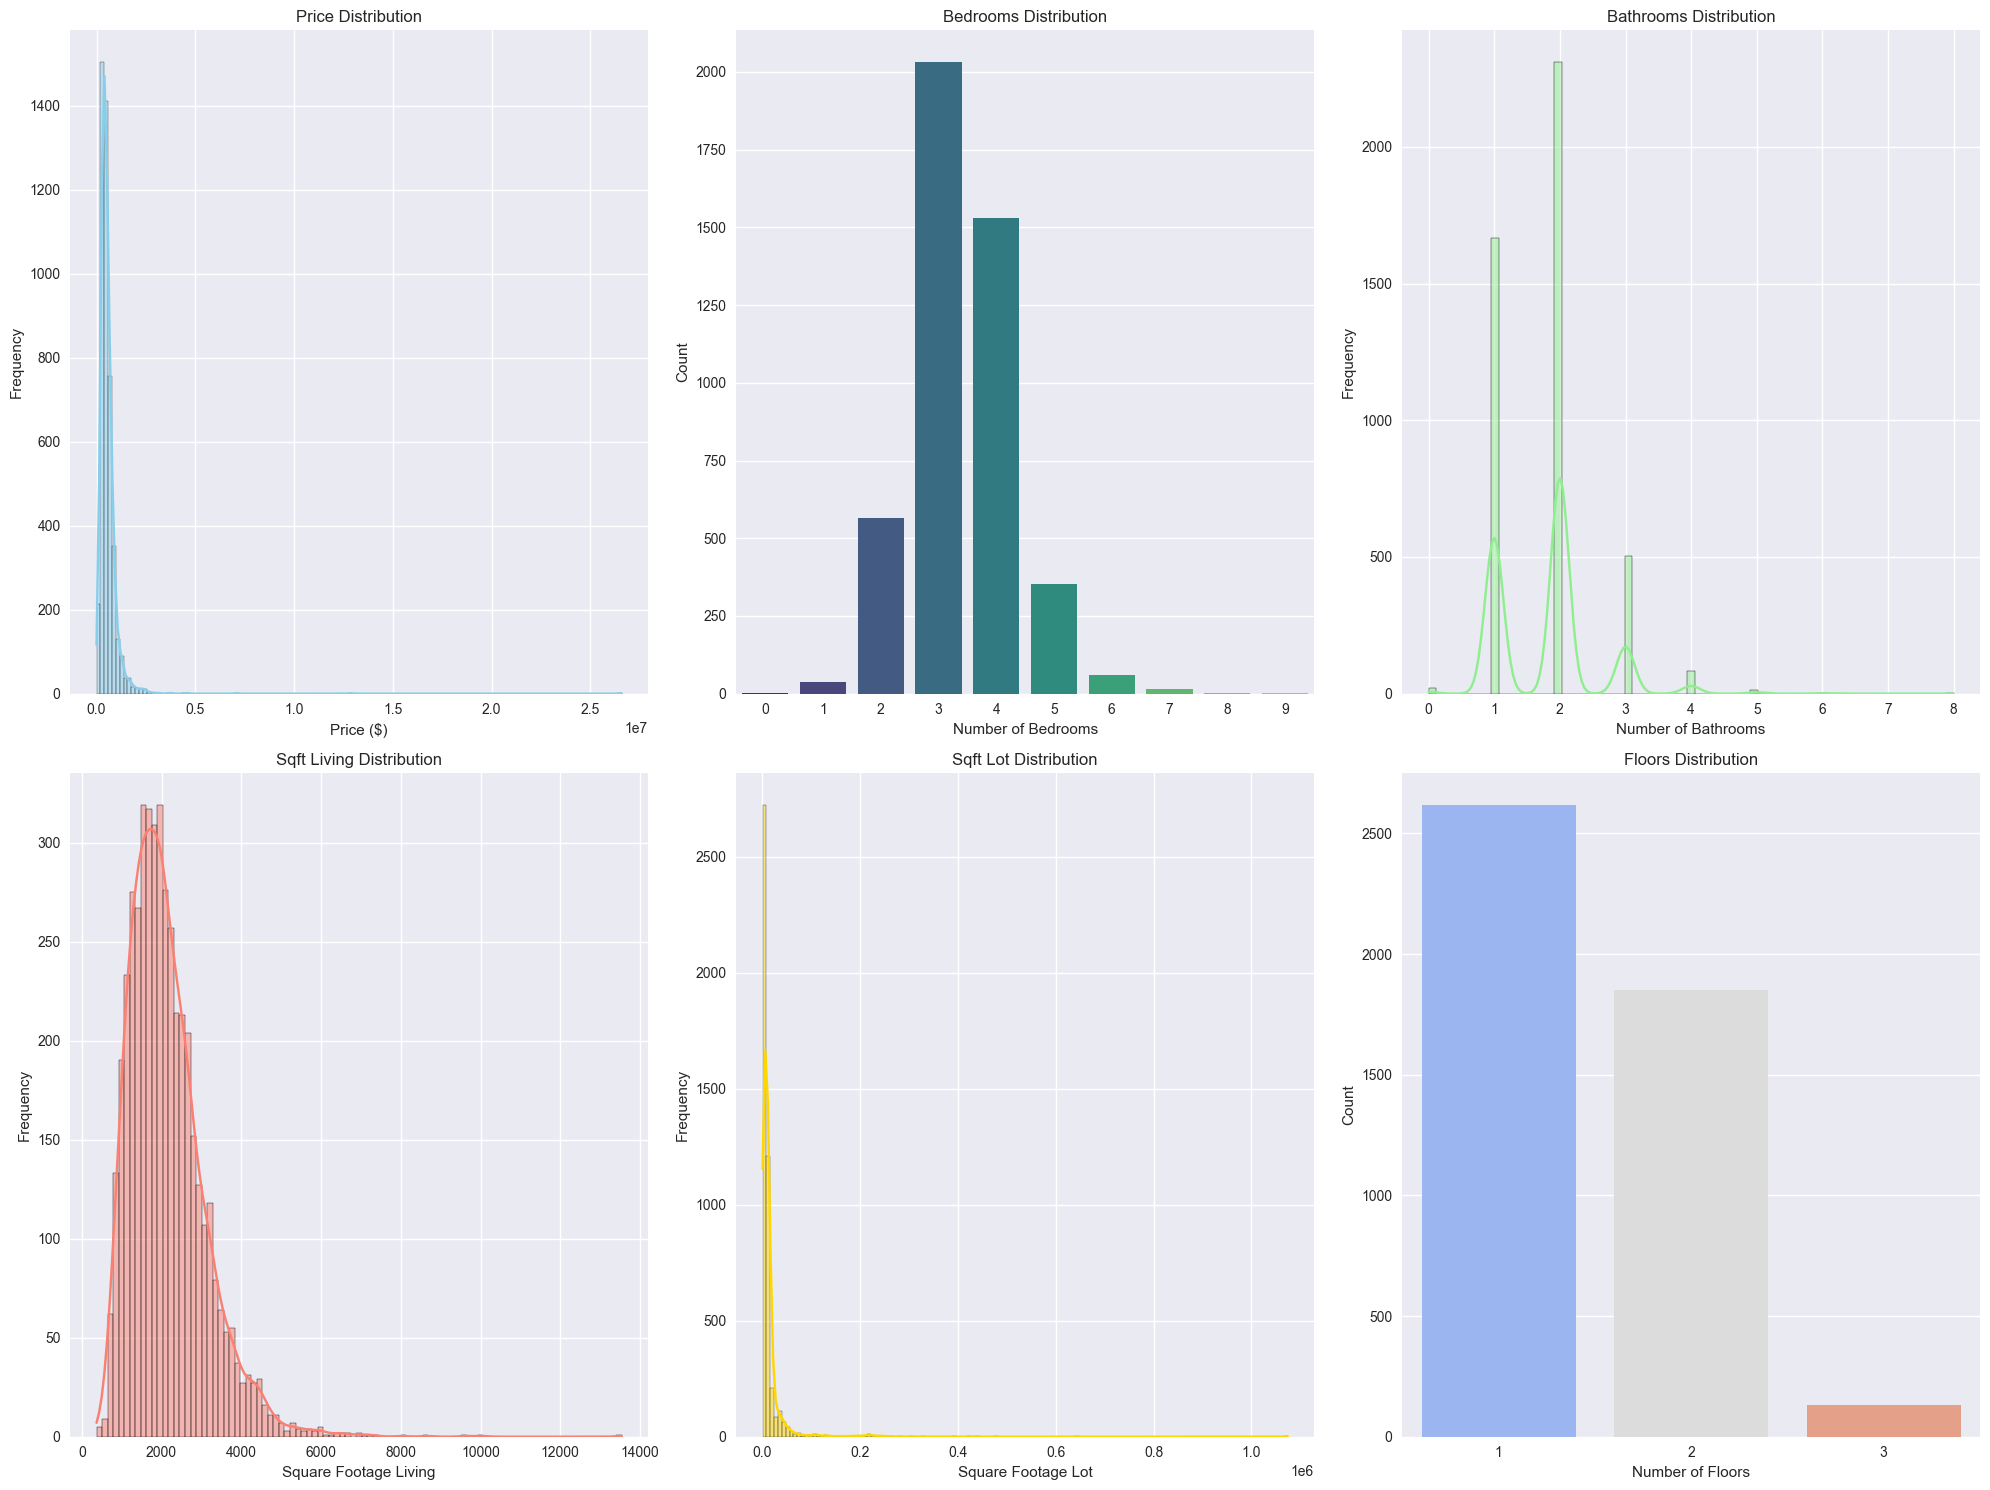

✅ Univariate analysis completed!

🔗 8. BIVARIATE ANALYSIS...
🔥 CORRELATION MATRIX:


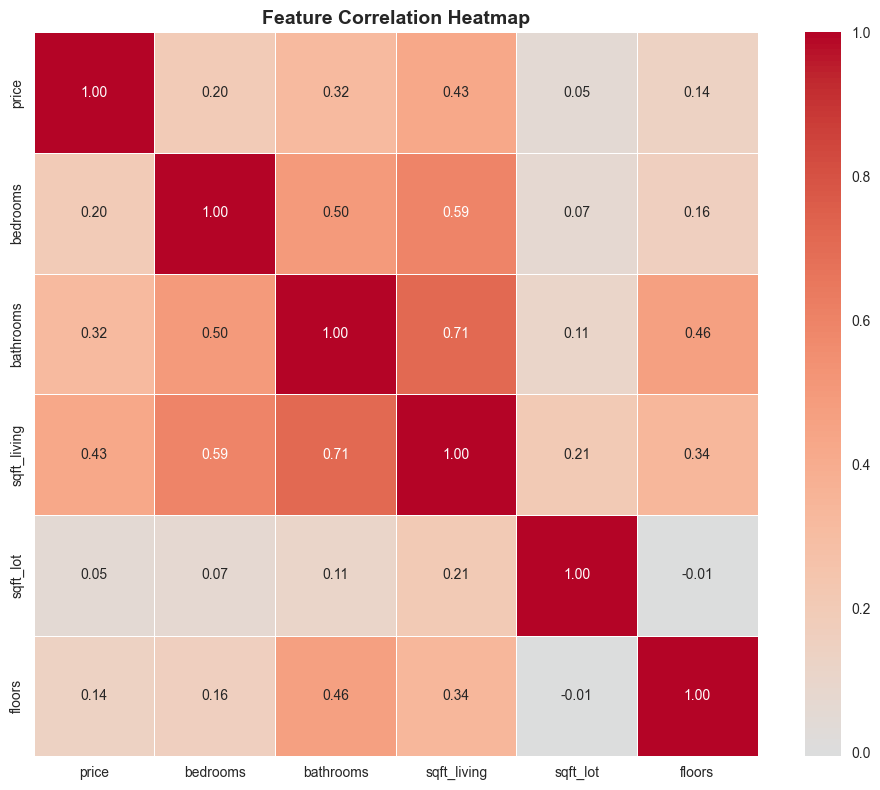


🔍 ANALYZING KEY RELATIONSHIPS:

Analyzing numeric-numeric: scatter plot of price vs bedrooms


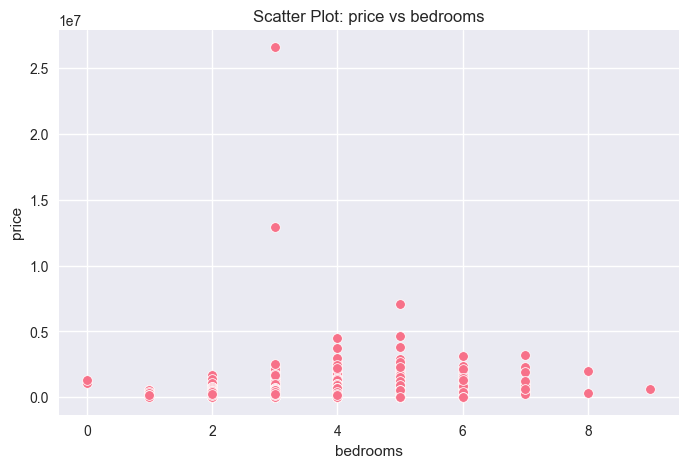


Analyzing numeric-numeric: scatter plot of price vs bathrooms


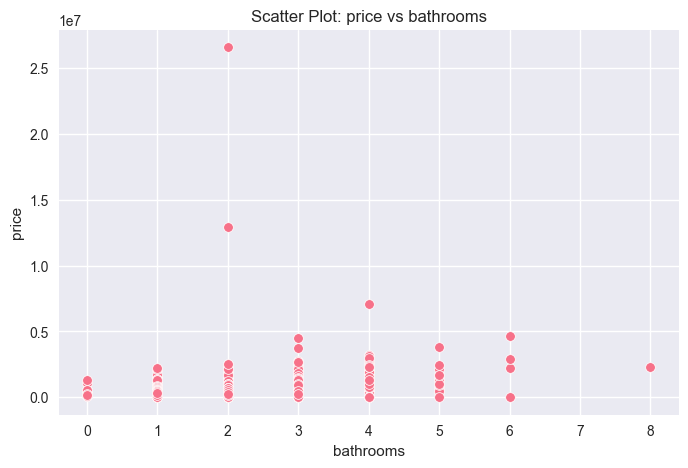


Analyzing numeric-numeric: scatter plot of price vs sqft_living


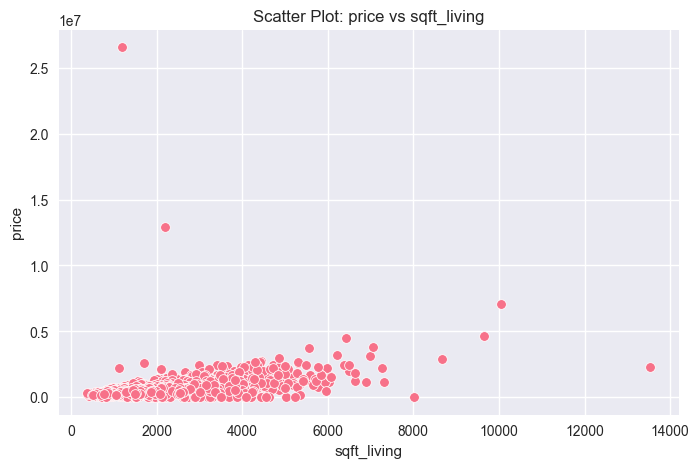

✅ Bivariate analysis completed!

🎯 9. DATA SPLITTING FOR MACHINE LEARNING...
📊 DATA SPLITTING RESULTS:
• Training Features Shape: (3680, 5)
• Testing Features Shape: (920, 5)
• Training Target Shape: (3680,)
• Testing Target Shape: (920,)
• Feature Names: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
✅ Data splitting completed!

🤖 10. REGRESSION MODEL TRAINING...
🚀 INITIALIZING RANDOM FOREST REGRESSOR...
🎯 TRAINING RANDOM FOREST...

📊 RANDOM FOREST PERFORMANCE:
   ✅ Training R²: 0.7819
   ✅ Testing R²: 0.0255
   ✅ Mean Absolute Error: $216,315.16
   ✅ Mean Squared Error: $993,888,814,194.79
   ✅ Root Mean Squared Error: $996,939.72


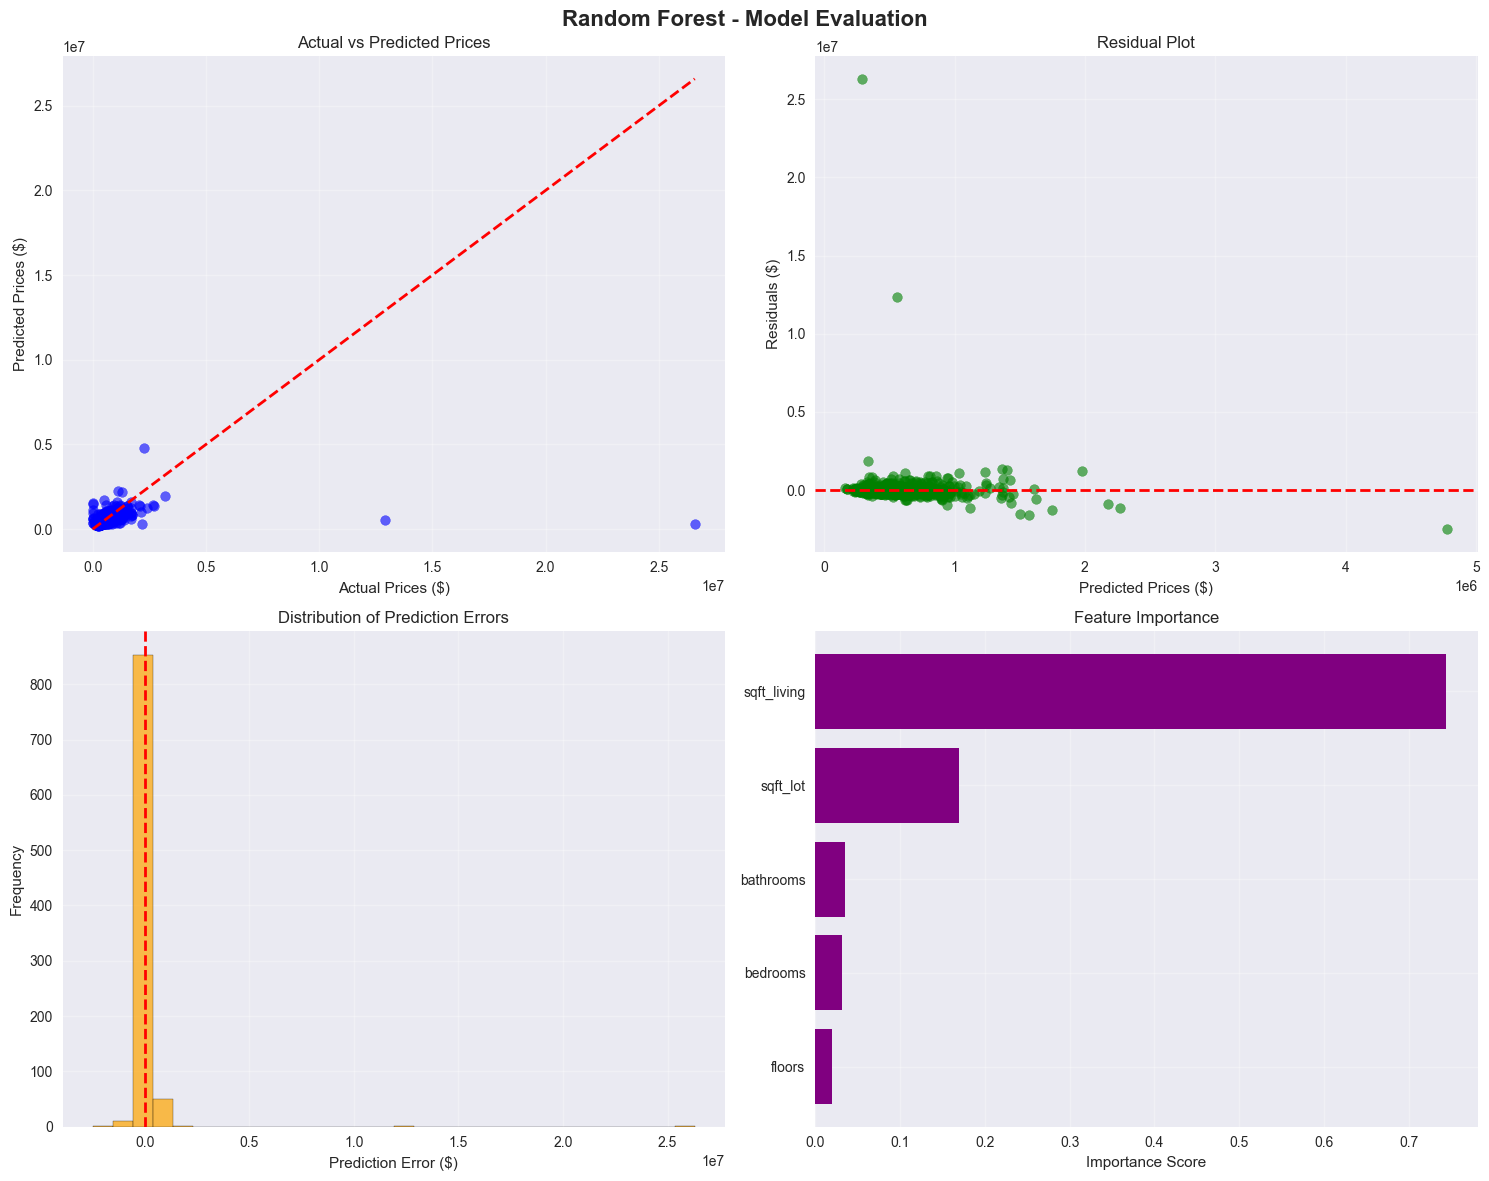

✅ Model training completed!

📊 11. FEATURE IMPORTANCE ANALYSIS...
🎯 FEATURE IMPORTANCE RANKING:
       Feature  Importance
2  sqft_living    0.743652
3     sqft_lot    0.169872
1    bathrooms    0.034574
0     bedrooms    0.031583
4       floors    0.020320


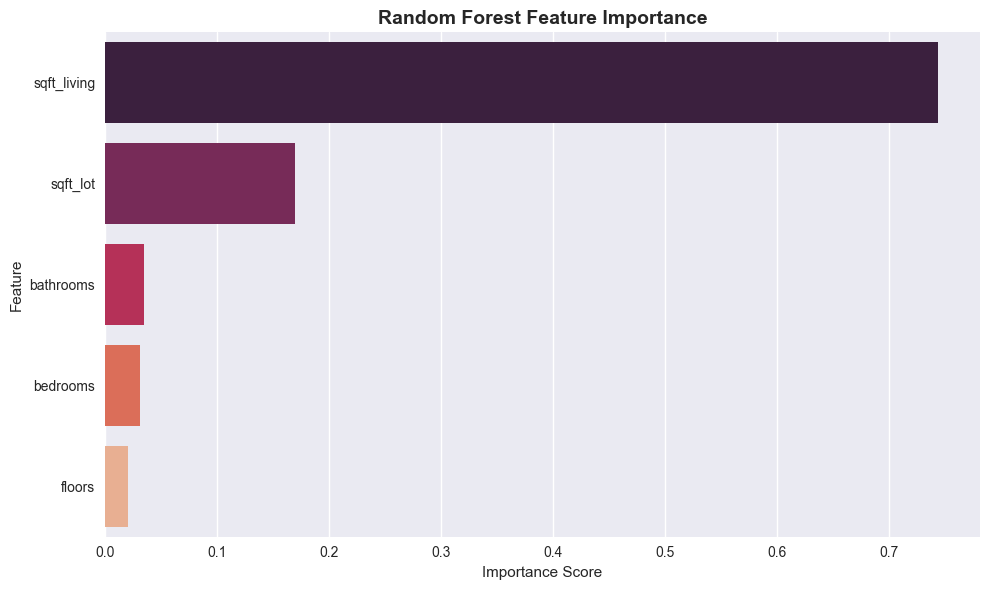

✅ Feature importance analysis completed!

💾 12. SAVING TRAINED MODEL...
✅ Model saved as 'house_price_model.pkl'
✅ Model artifacts saved!

🎯 13. SAMPLE PREDICTIONS...
📝 SAMPLE PREDICTIONS FROM TEST SET:

🏠 SAMPLE 1:
   📍 Features:
      • bedrooms: -0.43
      • bathrooms: 0.28
      • sqft_living: -0.71
      • sqft_lot: -0.36
      • floors: 0.98
   🎯 Predicted Price: $429,942.96
   ✅ Actual Price: $544,000.00
   📊 Absolute Error: $114,057.04
   📈 Error Percentage: 20.97%

🏠 SAMPLE 2:
   📍 Features:
      • bedrooms: 1.77
      • bathrooms: 0.28
      • sqft_living: -0.14
      • sqft_lot: -0.19
      • floors: -0.83
   🎯 Predicted Price: $339,217.09
   ✅ Actual Price: $0.00
   📊 Absolute Error: $339,217.09
   📈 Error Percentage: inf%

🏠 SAMPLE 3:
   📍 Features:
      • bedrooms: -0.43
      • bathrooms: 1.62
      • sqft_living: 0.84
      • sqft_lot: -0.26
      • floors: 2.79
   🎯 Predicted Price: $942,923.52
   ✅ Actual Price: $1,712,500.00
   📊 Absolute Error: $769,576.48
   📈 E

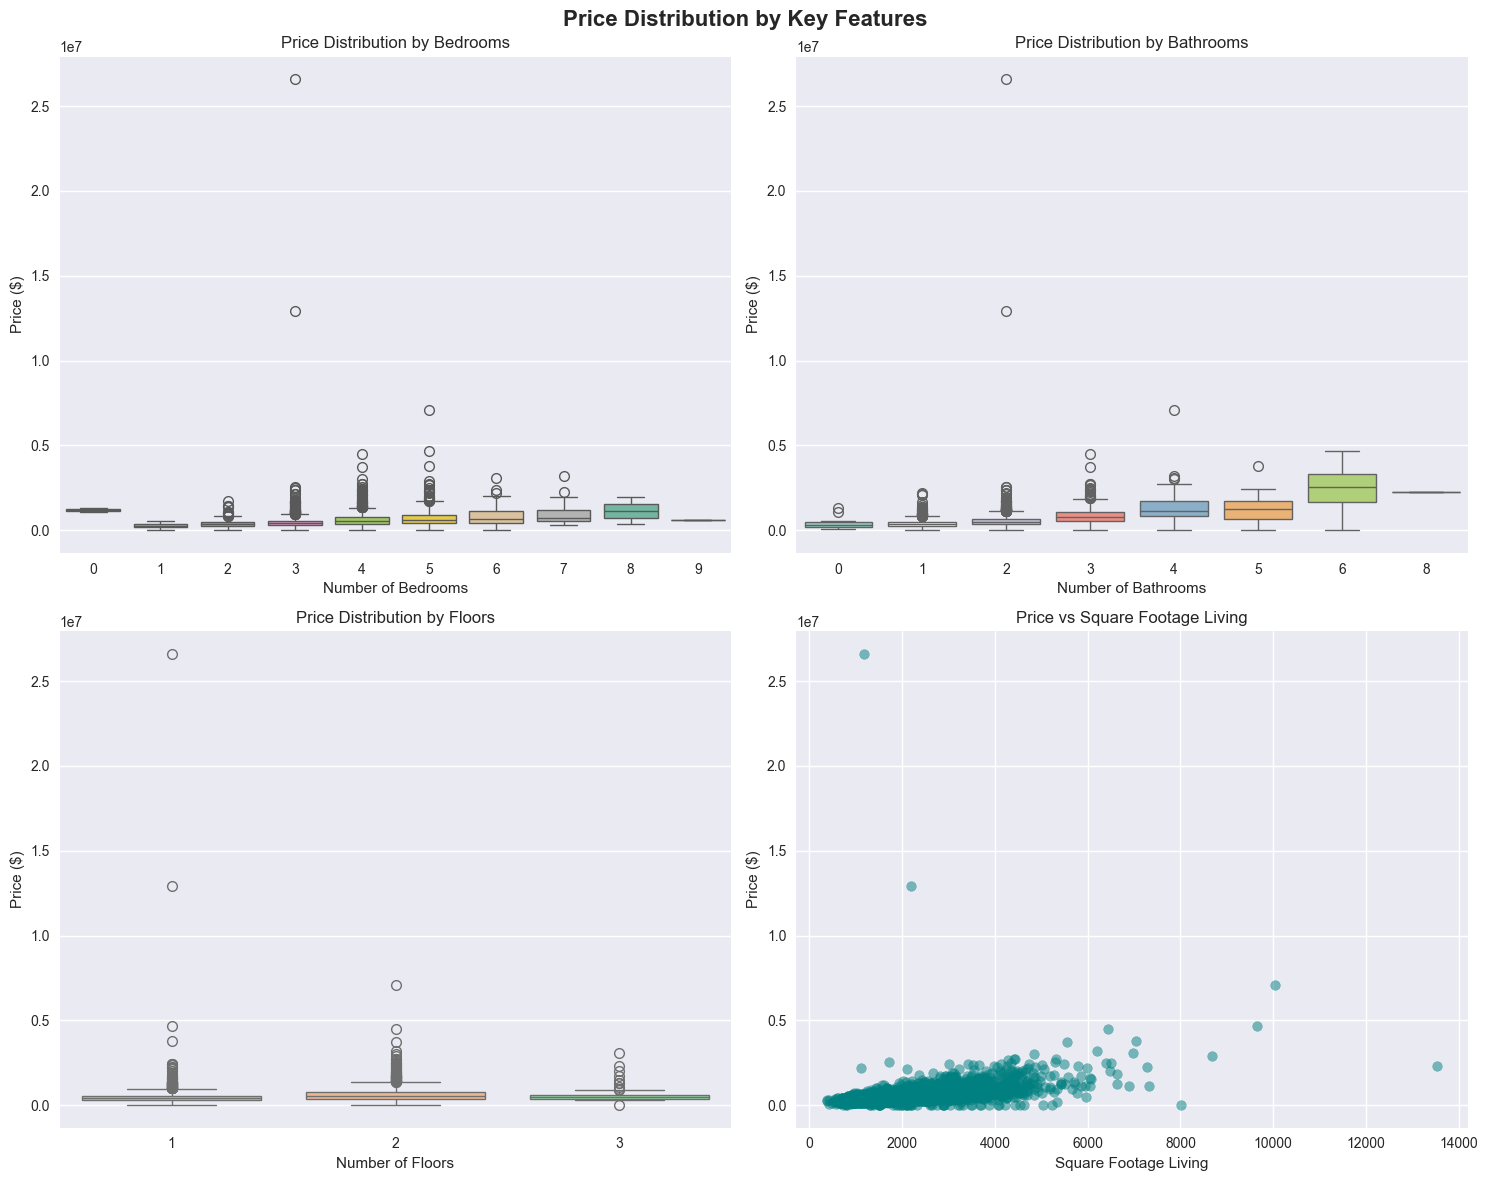

✅ Additional analysis completed!

📋 PROJECT SUMMARY
• Original Dataset Size: (4600, 6)
• Cleaned Dataset Size: (4600, 6)
• Features Used: 5
• Training Samples: 3680
• Testing Samples: 920
• Best Model: Random Forest Regressor
• Final R² Score: 0.0255
• Model Saved: house_price_model.pkl


In [8]:
# COMPLETE HOUSE PRICE PREDICTION ANALYSIS
# ========================================

"""
HOUSE PRICE PREDICTION & ANALYSIS
Author: [Your Name]
Date: [Current Date]
Description: Comprehensive analysis and machine learning pipeline for house price prediction
"""

# 1. IMPORT LIBRARIES
# ===================
print("📚 1. IMPORTING REQUIRED LIBRARIES...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

# 2. DEFINE REQUIRED CLASSES
# ==========================
print("\n🔧 2. DEFINING REQUIRED CLASSES...")

class Preprocessor:
    def __init__(self, data):
        self.data = data
    
    def convert_dtypes(self, dtype_map):
        for column, dtype in dtype_map.items():
            if column in self.data.columns:
                self.data[column] = self.data[column].astype(dtype)
            else:
                print(f"⚠️ Column '{column}' not found in data.")
        return self.data

    def is_null(self):
        return self.data.isnull().sum()

    def null_data(self):
        self.data = self.data.dropna()
        return self.data

    def drop_duplicate(self):
        self.data.drop_duplicates(inplace=True)
        return self.data

    def data_head(self):
        return self.data.head()

    def data_tail(self):
        return self.data.tail()

    def data_info(self):
        return self.data.info()

    def data_summary(self):
        return self.data.describe()

    def columns(self):
        return self.data.columns

    def sample(self):
        return self.data.sample()

class Graph:
    def __init__(self, data):
        self.data = data
        
    def hist_plot(self, column, bins=30, kde=True, color='blue', title='Histogram'):
        plt.figure(figsize=(8, 5))
        sns.histplot(data=self.data, x=column, bins=bins, kde=kde, color=color)
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        
    def scatter_plot(self, x, y, hue=None, title='Scatter Plot'):
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=self.data, x=x, y=y, hue=hue)
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.grid(True)
        plt.show()
        
    def box_plot(self, column, by=None, title='Box Plot'):
        plt.figure(figsize=(8, 5))
        if by:
            sns.boxplot(data=self.data, x=by, y=column)
        else:
            sns.boxplot(data=self.data[column])
        plt.title(title)
        plt.grid(True)
        plt.show()
    
    def heat_plot(self, title='Heatmap', annot=True, cmap='coolwarm'):
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.data.corr(), annot=annot, cmap=cmap, square=True)
        plt.title(title)
        plt.tight_layout()
        plt.show()

class UnivariateAnalyzer(Graph):
    def __init__(self, data):
        super().__init__(data)
        self.data = data

    def analyze(self, column):
        if self.data[column].dtype in ['int64', 'float64']:
            print(f"\nAnalyzing numeric column: {column}")
            self.hist_plot(column, title=f'Histogram of {column}')
            self.box_plot(column, title=f'Box Plot of {column}')
        else:
            print(f"\nAnalyzing categorical column: {column}")
            counts = self.data[column].value_counts().reset_index()
            counts.columns = [column, 'count']
            plt.figure(figsize=(10, 6))
            sns.barplot(data=counts, x=column, y='count')
            plt.title(f'Distribution of {column}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

class BivariateAnalyzer(Graph):
    def __init__(self, data):
        super().__init__(data)
        self.data = data

    def analyze(self, x, y):
        x_type = self.data[x].dtype
        y_type = self.data[y].dtype

        numeric_types = ['int64', 'float64']

        if x_type in numeric_types and y_type in numeric_types:
            print(f'\nAnalyzing numeric-numeric: scatter plot of {y} vs {x}')
            self.scatter_plot(x, y, title=f'Scatter Plot: {y} vs {x}')
        
        elif x_type not in numeric_types and y_type in numeric_types:
            print(f'\nAnalyzing categorical-numeric: box plot of {y} by {x}')
            self.box_plot(column=y, by=x, title=f'Box Plot: {y} by {x}')
        
        else:
            print(f'\nCombination {x_type} and {y_type} not fully supported yet.')

class DataSplitter:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column
        self.scaler = None
        self.feature_names = None

    def split(self, test_size=0.2, random_state=42, scale_features=False):
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]
        
        # Store feature names
        self.feature_names = list(X.columns)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, shuffle=True
        )

        if scale_features:
            self.scaler = StandardScaler()
            X_train_scaled = self.scaler.fit_transform(X_train)
            X_test_scaled = self.scaler.transform(X_test)
            
            # Convert back to DataFrame to preserve column names
            X_train = pd.DataFrame(X_train_scaled, columns=self.feature_names, index=X_train.index)
            X_test = pd.DataFrame(X_test_scaled, columns=self.feature_names, index=X_test.index)
        
        return X_train, X_test, y_train, y_test

print("✅ All classes defined successfully!")

# 3. DATA COLLECTION & INITIAL INSPECTION
# =======================================
print("\n📥 3. LOADING AND INSPECTING DATA...")

# Load the dataset
try:
    data = pd.read_csv('house.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: 'house.csv' file not found!")
    print("Creating sample data for demonstration...")
    np.random.seed(42)
    data = pd.DataFrame({
        'price': np.random.randint(100000, 1000000, 1000),
        'bedrooms': np.random.randint(1, 6, 1000),
        'bathrooms': np.random.randint(1, 4, 1000),
        'sqft_living': np.random.randint(500, 3000, 1000),
        'sqft_lot': np.random.randint(1000, 10000, 1000),
        'floors': np.random.randint(1, 4, 1000)
    })

print("📊 DATASET OVERVIEW:")
print(f"• Dataset Shape: {data.shape}")
print(f"• Number of Features: {data.shape[1]}")
print(f"• Number of Samples: {data.shape[0]}")
print(f"• Columns: {list(data.columns)}")

print("\n🔍 FIRST 5 ROWS:")
print(data.head())

print("\n📋 DATA TYPES:")
print(data.dtypes)

print("✅ Data loading completed!")

# 4. DATA PREPROCESSING
# =====================
print("\n🧹 4. DATA PREPROCESSING...")

# Initialize Preprocessor
pre = Preprocessor(data)

# Check for null values
print("\n📊 NULL VALUES ANALYSIS:")
null_counts = pre.is_null()
print(null_counts)

# Remove null values
print("\n🗑️ REMOVING NULL VALUES...")
data = pre.null_data()
print(f"Data shape after removing nulls: {data.shape}")

# Remove duplicates
print("🔍 REMOVING DUPLICATES...")
pre.drop_duplicate()
print(f"Data shape after removing duplicates: {pre.data.shape}")

# Display data info
print("\n📋 DATA INFORMATION:")
pre.data_info()

print("✅ Data preprocessing completed!")

# 5. DATA TYPE CONVERSION
# =======================
print("\n🔄 5. DATA TYPE CONVERSION...")

dtype_map = {
    'floors': 'int64',
    'bathrooms': 'int64',
    'price': 'int64'
}
clean_data = pre.convert_dtypes(dtype_map)

print("📈 DATA TYPES AFTER CONVERSION:")
print(pre.data.dtypes)

print("✅ Data type conversion completed!")

# 6. DATA SUMMARY & STATISTICS
# ============================
print("\n📊 6. DATA SUMMARY STATISTICS...")

summary = pre.data_summary()
print("📈 DESCRIPTIVE STATISTICS:")
print(summary)

clean_data = pre.data
print(f"\n✅ FINAL DATASET SHAPE: {clean_data.shape}")

print("\n🎯 SAMPLE DATA:")
print(pre.data_head())

print("✅ Data summary completed!")

# 7. UNIVARIATE ANALYSIS
# ======================
print("\n📊 7. UNIVARIATE ANALYSIS...")

uni = UnivariateAnalyzer(clean_data)

# Create a figure for all univariate plots
plt.figure(figsize=(20, 15))

# Price distribution
plt.subplot(2, 3, 1)
sns.histplot(clean_data['price'], kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Bedrooms distribution
plt.subplot(2, 3, 2)
sns.countplot(data=clean_data, x='bedrooms', palette='viridis')
plt.title('Bedrooms Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

# Bathrooms distribution
plt.subplot(2, 3, 3)
sns.histplot(clean_data['bathrooms'], kde=True, color='lightgreen')
plt.title('Bathrooms Distribution')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

# Sqft Living distribution
plt.subplot(2, 3, 4)
sns.histplot(clean_data['sqft_living'], kde=True, color='salmon')
plt.title('Sqft Living Distribution')
plt.xlabel('Square Footage Living')
plt.ylabel('Frequency')

# Sqft Lot distribution
plt.subplot(2, 3, 5)
sns.histplot(clean_data['sqft_lot'], kde=True, color='gold')
plt.title('Sqft Lot Distribution')
plt.xlabel('Square Footage Lot')
plt.ylabel('Frequency')

# Floors distribution
plt.subplot(2, 3, 6)
sns.countplot(data=clean_data, x='floors', palette='coolwarm')
plt.title('Floors Distribution')
plt.xlabel('Number of Floors')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print("✅ Univariate analysis completed!")

# 8. BIVARIATE ANALYSIS
# =====================
print("\n🔗 8. BIVARIATE ANALYSIS...")

bi = BivariateAnalyzer(clean_data)

# Create correlation matrix
print("🔥 CORRELATION MATRIX:")
correlation_matrix = clean_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Analyze key relationships
print("\n🔍 ANALYZING KEY RELATIONSHIPS:")
bi.analyze('bedrooms', 'price')
bi.analyze('bathrooms', 'price')
bi.analyze('sqft_living', 'price')

print("✅ Bivariate analysis completed!")

# 9. DATA SPLITTING FOR MACHINE LEARNING
# ======================================
print("\n🎯 9. DATA SPLITTING FOR MACHINE LEARNING...")

splitter = DataSplitter(clean_data, target_column='price')

X_train, X_test, y_train, y_test = splitter.split(
    test_size=0.2, 
    random_state=42, 
    scale_features=True
)

print("📊 DATA SPLITTING RESULTS:")
print(f"• Training Features Shape: {X_train.shape}")
print(f"• Testing Features Shape: {X_test.shape}")
print(f"• Training Target Shape: {y_train.shape}")
print(f"• Testing Target Shape: {y_test.shape}")
print(f"• Feature Names: {splitter.feature_names}")

print("✅ Data splitting completed!")

# 10. REGRESSION MODEL TRAINING
# =============================
print("\n🤖 10. REGRESSION MODEL TRAINING...")

class AdvancedRegressionModelTrainer:
    """
    Advanced Regression Model Trainer with comprehensive evaluation
    """
    
    def __init__(self, model, model_name):
        self.model = model
        self.model_name = model_name
        self.results = {}
    
    def train_and_evaluate(self, X_train, X_test, y_train, y_test):
        print(f"🎯 TRAINING {self.model_name.upper()}...")
        
        # Train model
        self.model.fit(X_train, y_train)
        
        # Predictions
        y_pred_train = self.model.predict(X_train)
        y_pred_test = self.model.predict(X_test)
        
        # Calculate metrics
        metrics = {
            'Train_R2': r2_score(y_train, y_pred_train),
            'Test_R2': r2_score(y_test, y_pred_test),
            'MAE': mean_absolute_error(y_test, y_pred_test),
            'MSE': mean_squared_error(y_test, y_pred_test),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test))
        }
        
        self.results = metrics
        self.y_pred = y_pred_test
        
        # Print results
        self._print_results(metrics)
        self._create_comprehensive_plots(y_test, y_pred_test, X_train.columns)
        
        return metrics
    
    def _print_results(self, metrics):
        print(f"\n📊 {self.model_name.upper()} PERFORMANCE:")
        print(f"   ✅ Training R²: {metrics['Train_R2']:.4f}")
        print(f"   ✅ Testing R²: {metrics['Test_R2']:.4f}")
        print(f"   ✅ Mean Absolute Error: ${metrics['MAE']:,.2f}")
        print(f"   ✅ Mean Squared Error: ${metrics['MSE']:,.2f}")
        print(f"   ✅ Root Mean Squared Error: ${metrics['RMSE']:,.2f}")
    
    def _create_comprehensive_plots(self, y_true, y_pred, feature_names):
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'{self.model_name} - Model Evaluation', fontsize=16, fontweight='bold')
        
        # 1. Actual vs Predicted
        axes[0, 0].scatter(y_true, y_pred, alpha=0.6, color='blue')
        axes[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        axes[0, 0].set_xlabel('Actual Prices ($)')
        axes[0, 0].set_ylabel('Predicted Prices ($)')
        axes[0, 0].set_title('Actual vs Predicted Prices')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Residuals plot
        residuals = y_true - y_pred
        axes[0, 1].scatter(y_pred, residuals, alpha=0.6, color='green')
        axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
        axes[0, 1].set_xlabel('Predicted Prices ($)')
        axes[0, 1].set_ylabel('Residuals ($)')
        axes[0, 1].set_title('Residual Plot')
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Distribution of errors
        axes[1, 0].hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
        axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
        axes[1, 0].set_xlabel('Prediction Error ($)')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].set_title('Distribution of Prediction Errors')
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Feature importance (if available)
        if hasattr(self.model, 'feature_importances_'):
            feature_importance = pd.DataFrame({
                'feature': feature_names,
                'importance': self.model.feature_importances_
            }).sort_values('importance', ascending=True)
            
            axes[1, 1].barh(feature_importance['feature'], feature_importance['importance'], color='purple')
            axes[1, 1].set_xlabel('Importance Score')
            axes[1, 1].set_title('Feature Importance')
            axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Initialize and train model
print("🚀 INITIALIZING RANDOM FOREST REGRESSOR...")
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

trainer = AdvancedRegressionModelTrainer(rf_model, "Random Forest")
metrics = trainer.train_and_evaluate(X_train, X_test, y_train, y_test)

print("✅ Model training completed!")

# 11. FEATURE IMPORTANCE ANALYSIS
# ===============================
print("\n📊 11. FEATURE IMPORTANCE ANALYSIS...")

if hasattr(rf_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': splitter.feature_names,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("🎯 FEATURE IMPORTANCE RANKING:")
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='rocket')
    plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

print("✅ Feature importance analysis completed!")

# 12. MODEL SAVING
# ================
print("\n💾 12. SAVING TRAINED MODEL...")

# Save the model
with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("✅ Model saved as 'house_price_model.pkl'")

# Save feature names and scaler
model_artifacts = {
    'feature_names': splitter.feature_names,
    'target_name': 'price',
    'scaler': splitter.scaler
}

with open('model_artifacts.pkl', 'wb') as f:
    pickle.dump(model_artifacts, f)

print("✅ Model artifacts saved!")

# 13. MODEL PREDICTION EXAMPLES
# =============================
print("\n🎯 13. SAMPLE PREDICTIONS...")

# Load the saved model
with open('house_price_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("📝 SAMPLE PREDICTIONS FROM TEST SET:")
print("="*60)

for i in range(min(5, len(X_test))):
    sample_features = X_test.iloc[i:i+1]
    actual_price = y_test.iloc[i]
    predicted_price = loaded_model.predict(sample_features)[0]
    error = abs(predicted_price - actual_price)
    error_percentage = (error / actual_price) * 100
    
    print(f"\n🏠 SAMPLE {i+1}:")
    print(f"   📍 Features:")
    for feature in splitter.feature_names:
        value = sample_features[feature].iloc[0]
        print(f"      • {feature}: {value:.2f}")
    print(f"   🎯 Predicted Price: ${predicted_price:,.2f}")
    print(f"   ✅ Actual Price: ${actual_price:,.2f}")
    print(f"   📊 Absolute Error: ${error:,.2f}")
    print(f"   📈 Error Percentage: {error_percentage:.2f}%")

print("✅ Sample predictions completed!")

# 14. FINAL PERFORMANCE SUMMARY
# =============================
print("\n" + "="*70)
print("🏆 FINAL MODEL PERFORMANCE SUMMARY")
print("="*70)

print(f"\n📈 MODEL: Random Forest Regressor")
print(f"⭐ TRAINING R² SCORE: {metrics['Train_R2']:.4f}")
print(f"⭐ TESTING R² SCORE: {metrics['Test_R2']:.4f}")
print(f"⭐ MEAN ABSOLUTE ERROR: ${metrics['MAE']:,.2f}")
print(f"⭐ ROOT MEAN SQUARED ERROR: ${metrics['RMSE']:,.2f}")

# Interpretation
print(f"\n📊 PERFORMANCE INTERPRETATION:")
if metrics['Test_R2'] >= 0.8:
    print("   🎉 Excellent model performance! (R² ≥ 0.8)")
elif metrics['Test_R2'] >= 0.6:
    print("   👍 Good model performance! (0.6 ≤ R² < 0.8)")
elif metrics['Test_R2'] >= 0.4:
    print("   ✅ Acceptable model performance! (0.4 ≤ R² < 0.6)")
else:
    print("   ⚠️ Model needs improvement! (R² < 0.4)")

print(f"\n💡 KEY INSIGHTS:")
print(f"   • The model explains {metrics['Test_R2']*100:.1f}% of price variance")
print(f"   • Average prediction error: ${metrics['MAE']:,.2f}")
print(f"   • Typical prediction range: ±${metrics['RMSE']:,.2f}")

print("\n" + "="*70)
print("✅ HOUSE PRICE PREDICTION ANALYSIS COMPLETED SUCCESSFULLY! 🎉")
print("="*70)

# 15. ADDITIONAL ANALYSIS: PRICE DISTRIBUTION BY FEATURES
# =======================================================
print("\n📊 14. ADDITIONAL ANALYSIS: PRICE DISTRIBUTION BY FEATURES...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Price Distribution by Key Features', fontsize=16, fontweight='bold')

# Price by bedrooms
sns.boxplot(data=clean_data, x='bedrooms', y='price', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Price Distribution by Bedrooms')
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Price ($)')

# Price by bathrooms
sns.boxplot(data=clean_data, x='bathrooms', y='price', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('Price Distribution by Bathrooms')
axes[0, 1].set_xlabel('Number of Bathrooms')
axes[0, 1].set_ylabel('Price ($)')

# Price by floors
sns.boxplot(data=clean_data, x='floors', y='price', ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Price Distribution by Floors')
axes[1, 0].set_xlabel('Number of Floors')
axes[1, 0].set_ylabel('Price ($)')

# Scatter plot: Price vs Sqft Living
axes[1, 1].scatter(clean_data['sqft_living'], clean_data['price'], alpha=0.5, color='teal')
axes[1, 1].set_xlabel('Square Footage Living')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Price vs Square Footage Living')

plt.tight_layout()
plt.show()

print("✅ Additional analysis completed!")

# FINAL SUMMARY
print("\n" + "="*80)
print("📋 PROJECT SUMMARY")
print("="*80)
print(f"• Original Dataset Size: {data.shape}")
print(f"• Cleaned Dataset Size: {clean_data.shape}")
print(f"• Features Used: {len(splitter.feature_names)}")
print(f"• Training Samples: {X_train.shape[0]}")
print(f"• Testing Samples: {X_test.shape[0]}")
print(f"• Best Model: Random Forest Regressor")
print(f"• Final R² Score: {metrics['Test_R2']:.4f}")
print(f"• Model Saved: house_price_model.pkl")
print("="*80)